In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# from google.colab import drive
# drive.mount("/content/drive")

import warnings

warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data = '/content/drive/MyDrive/Data/adult_train.csv'
df = pd.read_csv("../data/adult.csv")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
                 "marital-status", "occupation", "relationship", "race", "sex", 
                 "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [ ]:
# Dataset dimensions
df.shape

(32561, 15)

In [ ]:
# let's again preview the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# summary of info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          

In [ ]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# Declare Feature Vector and target variable
X = df.drop(['income'], axis=1)

y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((21815, 14), (10746, 14))

In [ ]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
27585,51,Private,123429,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
18010,46,?,148489,HS-grad,9,Married-spouse-absent,?,Not-in-family,Asian-Pac-Islander,Male,0,0,40,Philippines
22472,25,Private,267431,Bachelors,13,Never-married,Prof-specialty,Own-child,Black,Female,0,0,55,United-States
4585,27,Private,37088,Assoc-acdm,12,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States
11191,47,Local-gov,114459,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,45,United-States


In [ ]:
# ! pip install --upgrade category_encoders
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
                                  "race", "sex", "capital-gain", "capital-loss", "native-country"])


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
27585,51,1,123429,1,1,1,1,1,1,1,1,1,50,1
18010,46,2,148489,2,2,2,2,2,2,1,1,1,40,2
22472,25,1,267431,3,3,3,3,3,3,2,1,1,55,1
4585,27,1,37088,4,4,3,4,2,1,1,1,1,40,1
11191,47,3,114459,1,1,1,3,1,1,1,2,1,45,1


In [ ]:
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14160,27,1,160178,7,7,4,7,2,1,2,1.0,1.0,38,1
27048,45,7,50567,2,2,1,1,6,1,2,1.0,1.0,40,1
28868,29,1,185908,3,3,1,1,1,3,1,1.0,1.0,55,1
5667,30,1,190040,3,3,3,11,2,1,2,1.0,1.0,40,1
7827,29,6,189346,7,7,4,5,2,1,1,41.0,1.0,50,1


# Random Forest Classifier model with default parameters

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8490


# Random Forest Classifier model with parameter n_estimators=100

In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8490


# Find Important Features with Random forest model

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

fnlwgt            0.170878
age               0.161310
marital-status    0.103101
occupation        0.099426
hours-per-week    0.090012
relationship      0.082957
capital-gain      0.077178
education         0.050547
education-num     0.048269
workclass         0.041378
capital-loss      0.026340
native-country    0.019597
race              0.014930
sex               0.014077
dtype: float64

# Visualize feature scores of the features

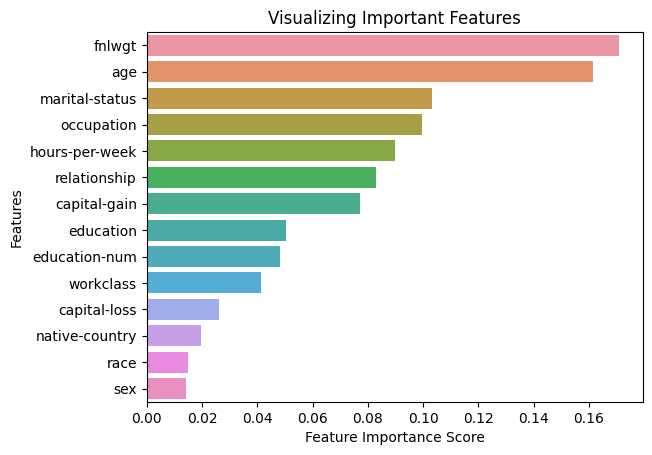

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# 17. Build Random Forest model on selected features 

In [ ]:
# declare feature vector and target variable

X = df.drop(["income", "sex", "race", "native-country"], axis=1)

y = df["income"]

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
                                  "capital-gain", "capital-loss"])


X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with those variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with those variables removed : 0.8483


# Confusion Matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7583  613]
 [1017 1533]]


# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      8196
        >50K       0.71      0.60      0.65      2550

    accuracy                           0.85     10746
   macro avg       0.80      0.76      0.78     10746
weighted avg       0.84      0.85      0.84     10746

